#### CV score
* cross_val_score
    - Stratified k fold 를 활용하여 보다 쉽게 교차검증을 해주는 라이브러리

In [1]:
# 라이브러리 불러오기
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cv score 가져오기
from sklearn.model_selection import cross_val_score,cross_validate
# decesion tree 가져오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# 데이터 준비하기
iris=load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 데이터셋
data=iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# 데이터 셋이 편향되어 있음 확인
target=iris['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 모델선정
dtc=DecisionTreeClassifier(random_state=123)
knn=KNeighborsClassifier(n_neighbors=3)

### cross_validate
- parameter
    * estimator : 모델
    * X : 트레이닝 데이터값
    * y : 트레이닝 타겟값
    * cv : 교차검증 분리 계수 cross-validation splitting strategy

In [7]:
# 교차검증 방법 선정 : 디테일한 결과 보기
res_cv=cross_validate(dtc,data,target,cv=3)
res_cv

{'fit_time': array([0.0049262 , 0.00172377, 0.0016377 ]),
 'score_time': array([0.00152993, 0.00057006, 0.00038719]),
 'test_score': array([0.98, 0.94, 0.98])}

In [8]:
# 교차검증 방법 : 스코어만 보기
knn_cv=cross_val_score(knn,data,target,cv=3)
dtc_cv=cross_val_score(dtc,data,target,cv=3)
print(dtc_cv.mean(),knn_cv.mean())

0.9666666666666667 0.9733333333333333


### GridSearchCV
* 교차 검증과 하이퍼 파라미터 튜닝을 동시에 
* parameter
    - estimator: 모델
    - param_grid: 하이퍼 파라미터
    - scoring: 성능평가 지표 'accuracy'
    - cv: 교차검증 세트 숫자
    - refit: 최적의 하이퍼파라미터에 대한 재학습 True

In [9]:
from sklearn.model_selection import GridSearchCV,train_test_split
X_train,X_test,y_train,y_test= train_test_split(data,target,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [11]:
# 모델선정
knn=KNeighborsClassifier()
# 파라미터를 어느 범위에서 조정해서 최적의 파라미터를 찾을 것인가
pagrid={'n_neighbors':[2,3,4,5,6]}
grid_knn=GridSearchCV(knn,param_grid=pagrid,cv=3,refit=True)
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6]})

## grid search 결과
- best_estimator_
- best_index_
- best_params_
- best_score_
- classes_
- cv
- cv_results_

In [12]:
print('최적의 모델:',grid_knn.best_estimator_)
print('최적의 인덱스:',grid_knn.best_index_)
print('최적의 파라미터:',grid_knn.best_params_)
print('최적의 정확도:',grid_knn.best_score_)
print('파라미터별 평균정확도:',grid_knn.cv_results_['mean_test_score'])

최적의 모델: KNeighborsClassifier(n_neighbors=3)
최적의 인덱스: 1
최적의 파라미터: {'n_neighbors': 3}
최적의 정확도: 0.9833333333333334
파라미터별 평균정확도: [0.95833333 0.98333333 0.975      0.96666667 0.975     ]


In [13]:
pred=grid_knn.predict(X_test)
acc=accuracy_score(pred,y_test)
acc

0.9666666666666667

In [18]:
dtc=DecisionTreeClassifier()
pgrid={'max_depth':[1,2,3,4],'min_samples_split':[2,3]}
griddtc=GridSearchCV(dtc,param_grid=pgrid,cv=3,refit=True)
griddtc.fit(X_train,y_train)
pred=griddtc.predict(X_test)
acc =accuracy_score(pred,y_test)
acc

1.0

In [19]:
print('최적의 모델:',griddtc.best_estimator_)
print('최적의 인덱스:',griddtc.best_index_)
print('최적의 파라미터:',griddtc.best_params_)
print('최적의 정확도:',griddtc.best_score_)
print('파라미터별 평균정확도:',griddtc.cv_results_['mean_test_score'])

최적의 모델: DecisionTreeClassifier(max_depth=3)
최적의 인덱스: 4
최적의 파라미터: {'max_depth': 3, 'min_samples_split': 2}
최적의 정확도: 0.9583333333333334
파라미터별 평균정확도: [0.675      0.675      0.925      0.925      0.95833333 0.95
 0.94166667 0.94166667]


In [62]:
dtcf=DecisionTreeClassifier(max_depth=2,min_samples_split=2)
dtcf.fit(X_train,y_train)
pred=dtcf.predict(X_test)
acc =accuracy_score(pred,y_test)
acc

0.9666666666666667

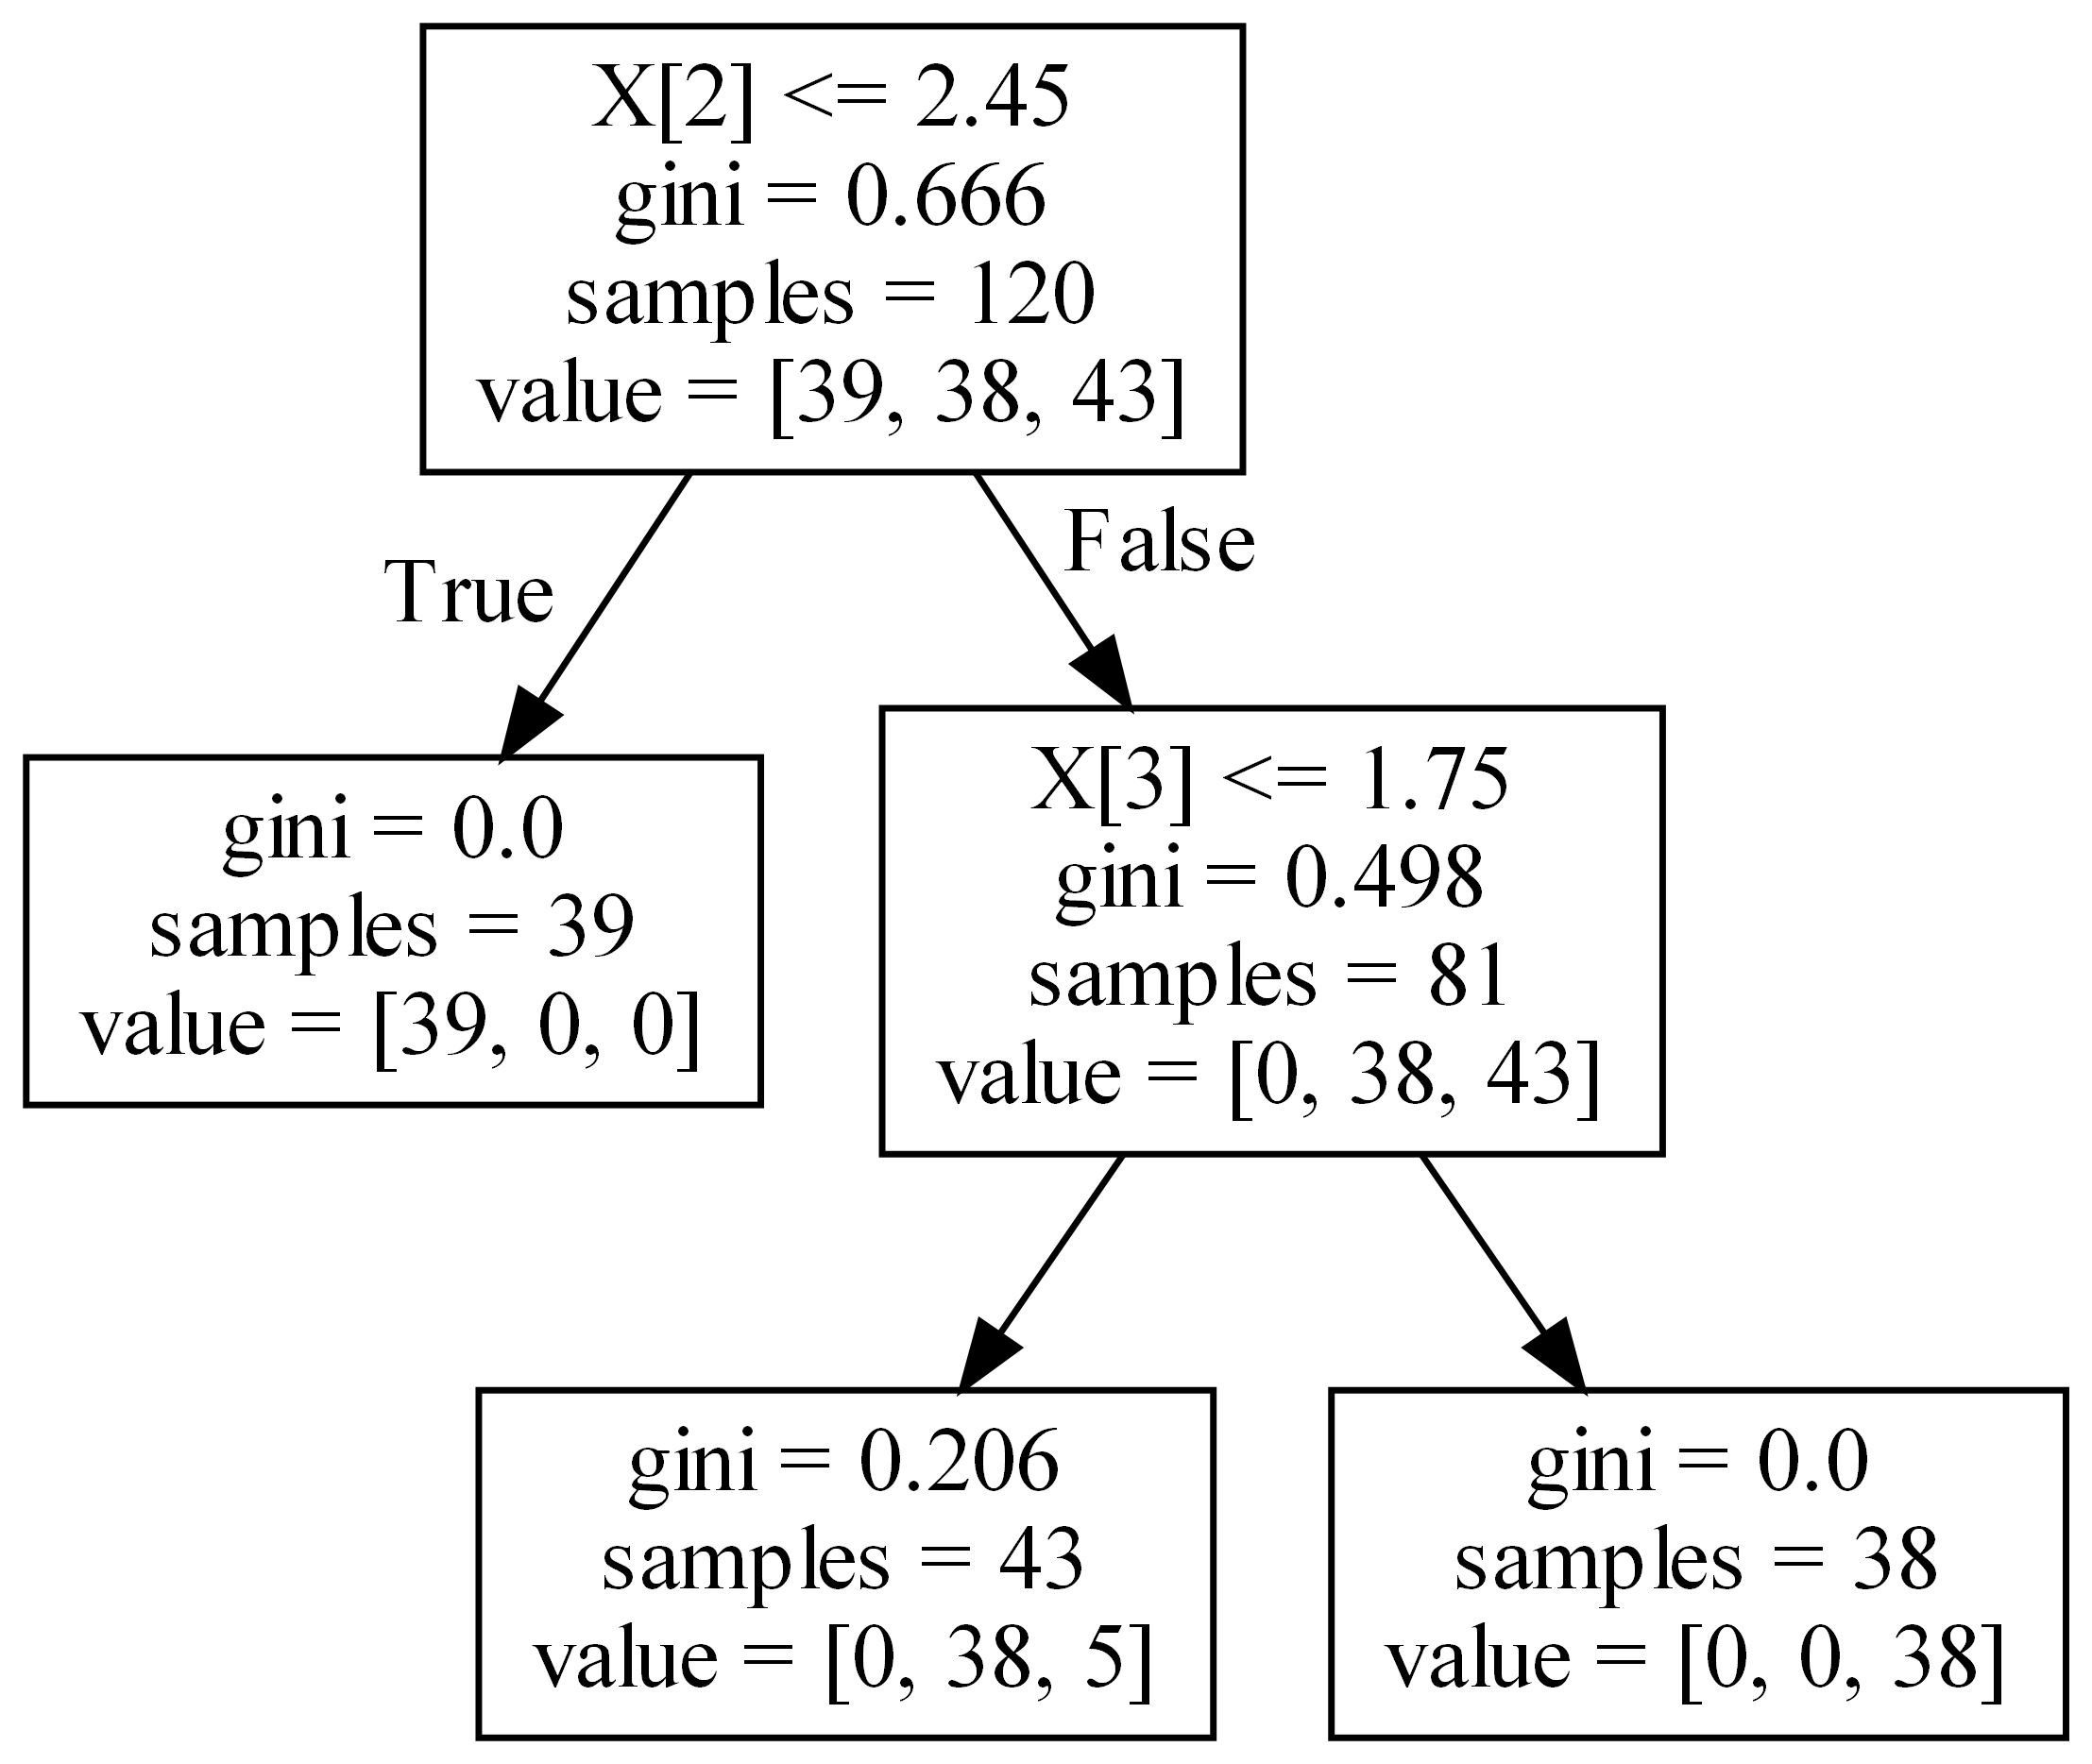

In [63]:
# 그래프를 그리기위한 노드 객체 생성
from sklearn.tree import export_graphviz
export_graphviz(dtcf,out_file='src/dtc1.dot')
from subprocess import call
call(['dot','-Tpng','src/dtc1.dot','-o','img/dtc1.png','-Gdpi=500'])
from IPython.display import Image
Image(filename='img/dtc1.png')